In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
stroke=pd.read_csv("E:/data science/python/New folder/healthcare-dataset-stroke-data.csv")
stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


<AxesSubplot:>

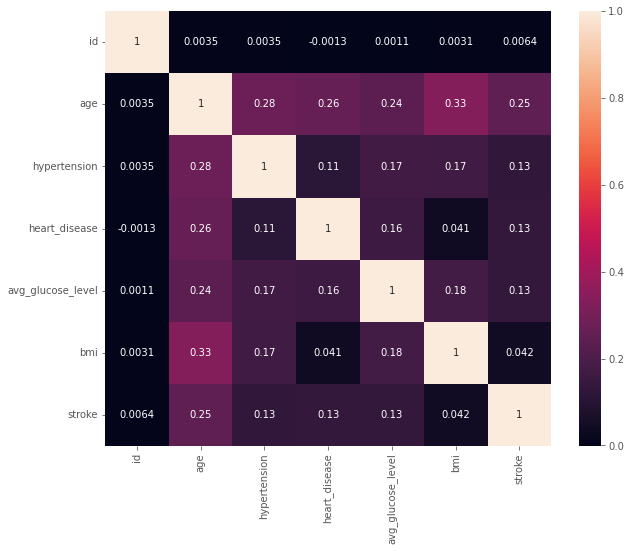

In [4]:
plt.figure(figsize=(10,8))
sns.heatmap(stroke.corr(),annot=True)

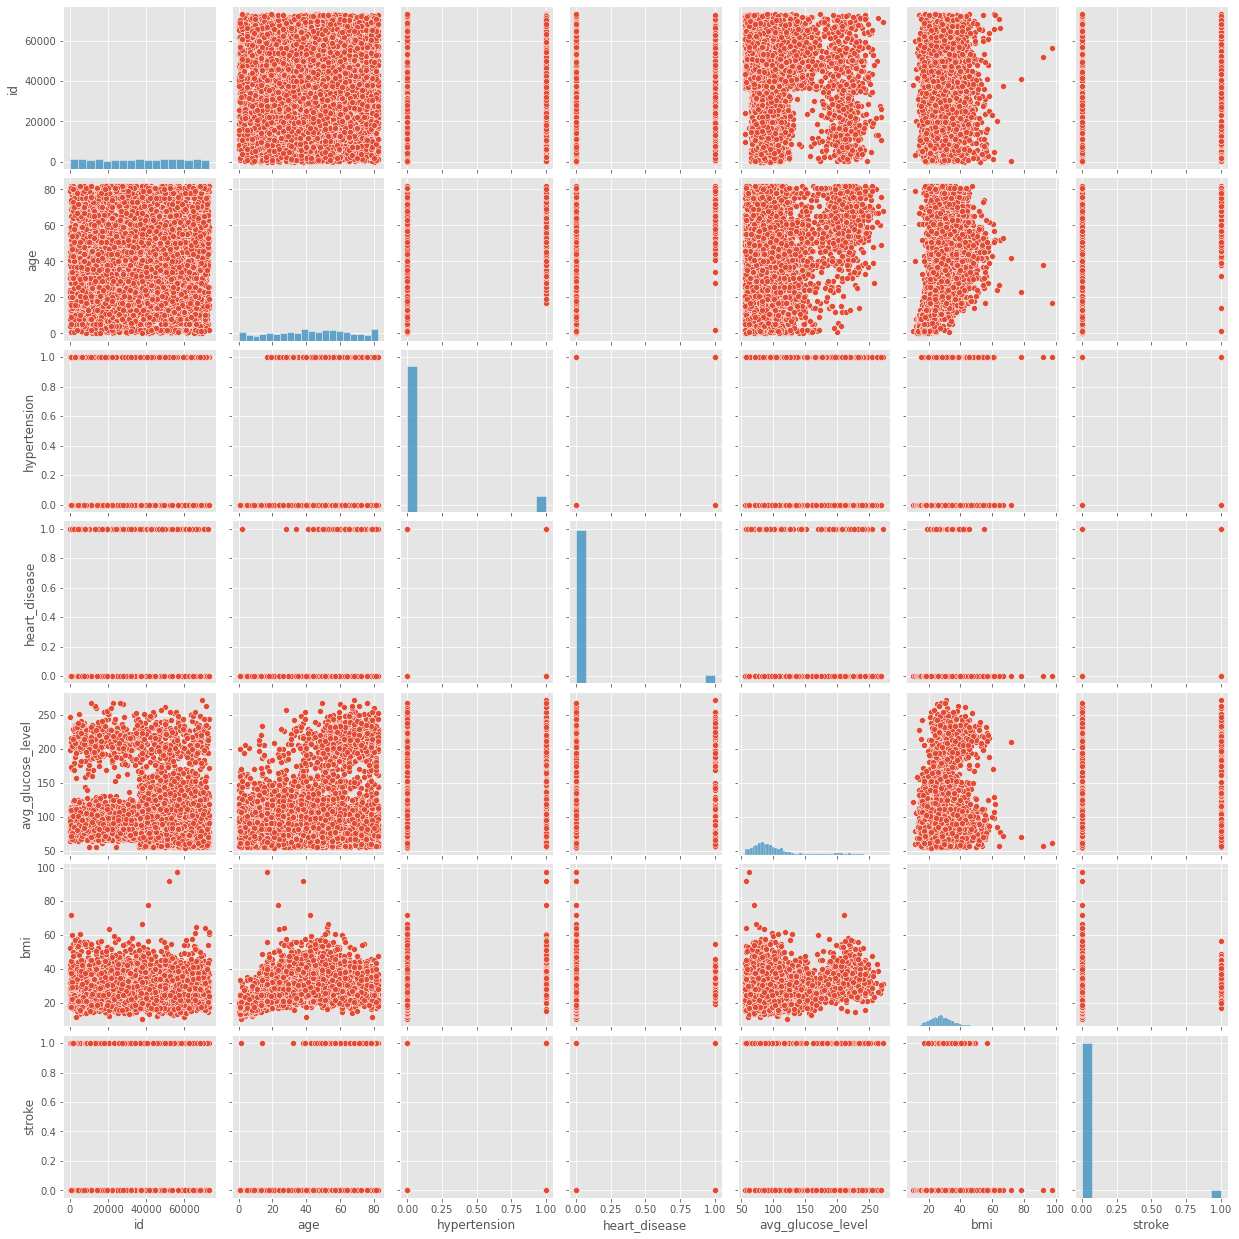

In [5]:
sns.pairplot(stroke)

 BMI is Highly Co related to Age

In [6]:
print(stroke['gender'].unique())
print(stroke['ever_married'].unique())
print(stroke['work_type'].unique())
print(stroke['Residence_type'].unique())
print(stroke['smoking_status'].unique())

['Male' 'Female' 'Other']
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [7]:
stroke.ever_married.replace({'No': 0,'Yes': 1},inplace=True)
stroke.gender.replace({'Male': 1,'Female': 2,'Other':3},inplace=True)
stroke.work_type.replace({'Private': 1,'Self-employed': 2,'Govt_job':3,'children':4,'Never_worked':5},inplace=True)
stroke.Residence_type.replace({'Urban': 1,'Rural': 2},inplace=True)
stroke.smoking_status.replace({'formerly smoked': 1,'never smoked': 2,'smokes':3,'Unknown':4},inplace=True)

In [8]:
stroke=stroke.dropna() 

In [9]:
stroke.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

<AxesSubplot:xlabel='bmi', ylabel='age'>

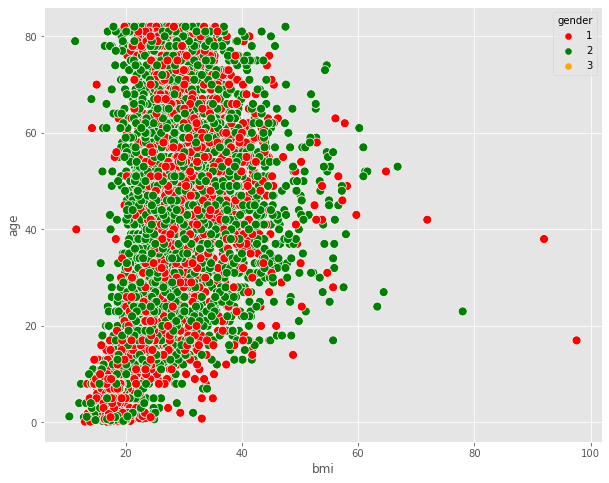

In [10]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=stroke,x='bmi',y='age',hue='gender',s=80,palette=['red','green','orange'])

In [11]:
stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,1,1,228.69,36.6,1,1
2,31112,1,80.0,0,1,1,1,2,105.92,32.5,2,1
3,60182,2,49.0,0,0,1,1,1,171.23,34.4,3,1
4,1665,2,79.0,1,0,1,2,2,174.12,24.0,2,1
5,56669,1,81.0,0,0,1,1,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,2,13.0,0,0,0,4,2,103.08,18.6,4,0
5106,44873,2,81.0,0,0,1,2,1,125.20,40.0,2,0
5107,19723,2,35.0,0,0,1,2,2,82.99,30.6,2,0
5108,37544,1,51.0,0,0,1,1,2,166.29,25.6,1,0


In [12]:
x=stroke.drop(['id','stroke'],axis=1)

In [13]:
y=stroke['stroke']

In [14]:
x.shape

(4909, 10)

In [15]:
y.shape

(4909,)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
X_scaled.shape

(4909, 10)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=30)

In [18]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=50,random_state=100)
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)

In [19]:
model_rf.score(X_test, y_test)

0.9584690553745928

In [20]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.041530944625407164
Mean Squared Error: 0.041530944625407164
Root Mean Squared Error: 0.20379142431762717
